In [1]:
#https://www.deepset.ai/german-word-embeddings =>
#https://int-emb-glove-de-wiki.s3.eu-central-1.amazonaws.com/vectors.txt
# 4GB, containing 1.3 MIO (!) tokens in 300Dims => filter for10% most common words

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.embedding import Embedding

In [3]:
N_most_frequent = 16000

### load embedding

In [4]:
glove_de_path = '../data/GloVe_vectors_de.txt'
glove_embedding_de = Embedding(language='de', path_list=[glove_de_path])

/Users/magdalena.aretz/code/nlp_scripts/venv/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Both a converter and dtype were specified for column 0 - only the converter will be used
  return func(*args, **kwargs)


total number of entries found:  1309279. Dimension: 300


In [5]:
print(glove_embedding_de.embedding.shape)
print(type(glove_embedding_de.embedding))
print(len(glove_embedding_de.index_to_word))
print(glove_embedding_de.index_to_word[0])

(1309279, 300)
<class 'pandas.core.frame.DataFrame'>
1309281
der


### load german corpus

In [6]:
#https://en.wiktionary.org/wiki/Wiktionary:Frequency_lists#German =>
#https://invokeit.wordpress.com/frequency-word-lists/ =>
#https://raw.githubusercontent.com/hermitdave/FrequencyWords/master/content/2016/de/de_50k.txt

In [7]:
corpus_path = '../data/de-top-50k.txt'
with open (corpus_path) as file:
    lines=file.readlines()

In [8]:
splitted_lines = [line.split() for line in lines]

In [9]:
df_frequencies = pd.DataFrame(splitted_lines)
df_frequencies.columns = ['word', 'frequency']
print(df_frequencies.shape)
df_frequencies.head(2)

(50000, 2)


,word,frequency
0,ich,3699605
1,sie,2409949


In [10]:
df_frequencies['frequency'] = df_frequencies.frequency.apply(lambda x: int(x))

<AxesSubplot:>

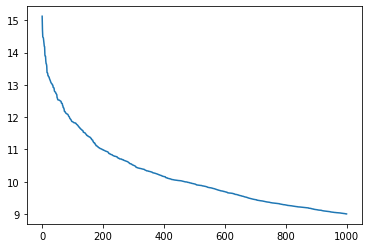

In [11]:
# super long tail
np.log(df_frequencies['frequency'].iloc[:1000]).plot()

# define top n

In [12]:
# these will be kept
print(df_frequencies.iloc[:N_most_frequent].tail(8))

              word  frequency
15992    gelächelt        224
15993  gebärmutter        224
15994  spirituelle        224
15995   flachlegen        224
15996       prison        223
15997        marek        223
15998     wanderte        223
15999     schaukel        223


In [13]:
frequent_words = set(df_frequencies.iloc[:N_most_frequent]['word'])
len(frequent_words)

16000

In [14]:
possible_words = set(glove_embedding_de.embedding.index)
len(possible_words)

1309279

In [15]:
# only keep words that are frequent and in index of embedding
words_to_keep = list(frequent_words & possible_words)
len(words_to_keep)

15652

In [16]:
print(len(frequent_words - set(words_to_keep))) # these are dismissed because they do not appear in embedding list
print(list(frequent_words - set(words_to_keep))[:8])

348
['freust', 'gottverdammter', 'stellvertretende', 'durchgeschnitten', 'wurdet', 'unterbreche', 'ã', 'krankenschwester']


# filter 

In [17]:
filtered_embedding = glove_embedding_de.embedding.copy()
filtered_embedding = filtered_embedding.loc(axis=0)[words_to_keep]
filtered_embedding.head(2)

,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
0,,,,,,,,,,,,,,,,,,,,,
violet,-0.787109,0.364014,0.114807,0.025848,-0.085388,0.022263,0.489746,-0.306885,0.083252,-0.175049,...,-0.269043,0.017303,0.029602,0.267578,-0.115479,-0.128906,-0.055969,-0.334229,-0.171021,0.093872
fangt,0.557129,-0.078674,0.159546,0.280762,-0.493164,-0.132446,-0.246460,-0.318604,-0.153809,0.631348,...,-0.105957,-0.143433,0.416504,0.564941,-0.283691,-0.512207,0.218994,0.146606,0.237549,0.248657


# write file

In [18]:
filtered_glove_path = f'../data/GloVe_vectors_de_{N_most_frequent}.txt'

In [19]:
filtered_embedding.to_csv(filtered_glove_path, sep=' ', index=True, header=None)
test = pd.read_csv(filtered_glove_path, sep=' ', index_col = 0)
test.head()

,-0.787,0.364,0.1148,0.02585,-0.0854,0.02226,0.4897,-0.307,0.08325,-0.175,...,-0.269,0.0173,0.0296,0.2676,-0.1155,-0.1289,-0.05597,-0.3342,-0.171.1,0.0939
violet,,,,,,,,,,,,,,,,,,,,,
fangt,0.55700,-0.07870,0.15950,0.28080,-0.4932,-0.13240,-0.24650,-0.31860,-0.15380,0.6313,...,-0.10596,-0.1434,0.41650,0.5650,-0.28370,-0.51200,0.2190,0.1466,0.2375,0.24870
denise,-0.26830,-0.35280,0.02563,-0.57280,0.2568,-0.11990,-0.09480,0.04660,0.54800,-0.4610,...,-0.01342,0.3208,0.13430,0.3190,-0.16220,-0.52000,-0.2502,-0.1796,0.4363,-0.24710
bot,0.81640,-0.01576,0.10230,-0.20470,0.4768,0.06890,0.76800,0.32450,0.07605,0.2250,...,-0.24550,0.3960,-0.12680,-0.1721,0.42700,-0.30130,-0.1024,-0.2032,0.2544,0.01791
durchgang,-0.06647,-0.57230,-0.02916,0.05220,-0.1532,0.37400,0.12415,0.15360,0.67900,-0.7560,...,0.83350,-0.9014,-0.11707,-0.5880,0.34280,0.41630,-0.2421,-0.3298,0.5527,-0.16870
überraschen,-0.15000,-0.39400,-0.08190,-0.05795,0.0518,0.02213,-0.21800,0.05475,-0.33840,0.1364,...,-0.21550,0.3281,0.11334,-0.1069,-0.04776,-0.09735,0.5200,-0.1848,0.5910,0.31520


## english most frequent words

In [20]:
# https://www.kaggle.com/rtatman/english-word-frequency

### load embedding

In [21]:
glove_en_path = '../data/glove.6B.50d.txt'
glove_embedding_en = Embedding(language='en', path_list=[glove_en_path])

/Users/magdalena.aretz/code/nlp_scripts/venv/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Both a converter and dtype were specified for column 0 - only the converter will be used
  return func(*args, **kwargs)


total number of entries found:  399997. Dimension: 50


In [22]:
print(glove_embedding_en.embedding.shape)
print(type(glove_embedding_en.embedding))
print(len(glove_embedding_en.index_to_word))
print(glove_embedding_en.index_to_word[0])

(399997, 50)
<class 'pandas.core.frame.DataFrame'>
400000
the


## load english corpus

In [23]:
# source: https://www.kaggle.com/rtatman/english-word-frequency, 333.333 most frequent words
df_word_frequencies = pd.read_csv('../data/en_unigram_freq.csv')

In [24]:
print(df_word_frequencies.shape)
df_word_frequencies.head()

(333333, 2)


,word,count
0,the,23135851162
1,of,13151942776
2,and,12997637966
3,to,12136980858
4,a,9081174698


<AxesSubplot:>

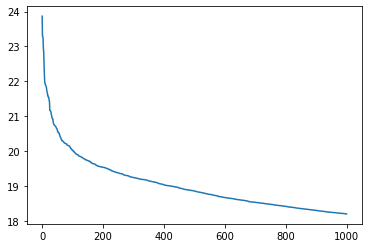

In [25]:
# super long tail
np.log(df_word_frequencies['count'].iloc[:1000]).plot()

In [26]:
# these will be kept
print(df_word_frequencies.iloc[:N_most_frequent].tail(8))

               word    count
15992     educating  2331409
15993        nortel  2331289
15994           kin  2331005
15995           koh  2330943
15996  affiliations  2330795
15997          cozy  2330794
15998      pussycat  2330623
15999  appropriated  2330545


In [37]:
frequent_words = set(df_word_frequencies.iloc[:N_most_frequent]['word'])
print(len(frequent_words))

15999


In [28]:
possible_words = set(glove_embedding_en.embedding.index)
print(len(possible_words))

399997

In [29]:
# only keep words that are frequent and in index of embedding
words_to_keep = list(frequent_words & possible_words)
len(words_to_keep)

15836

In [30]:
print(len(frequent_words - set(words_to_keep))) # these are dismissed because they do not appear in embedding list
print(list(frequent_words - set(words_to_keep))[:8])

163
[nan, 'keygen', 'livesex', 'permalink', 'holdem', 'checkboxes', 'beastiality', 'fioricet']


In [44]:
# deleteme
interesting_word = 'freedom'
print(df_word_frequencies[df_word_frequencies.word ==interesting_word])
print(interesting_word in words_to_keep)
print(interesting_word in glove_embedding_en.embedding.index)
print(interesting_word in filtered_embedding.index)
print(interesting_word in test.index)

         word     count
2075  freedom  38909717
True
True
True
True


# filter 

In [41]:
filtered_embedding = glove_embedding_en.embedding.copy()
filtered_embedding = filtered_embedding.loc(axis=0)[words_to_keep]
filtered_embedding.head(2)

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,,,,,,,,,,,,,,,,,,,,,
violet,0.257568,1.307617,-0.533691,-0.276123,0.293945,1.293945,-0.103882,-0.381592,-0.856445,0.220093,...,0.399414,0.457764,-0.321289,-0.909668,0.593262,-0.241821,0.261719,-1.717773,0.038666,0.096558
receives,0.346436,1.363281,0.354004,0.180420,0.554199,0.176025,0.084839,0.846680,1.380859,0.195190,...,0.965820,0.562012,-0.353516,-0.270508,-0.853516,-0.409912,-0.075317,0.823242,-0.026627,0.139160


# write file

In [32]:
filtered_glove_path = f'../data/glove.6B.50d.{N_most_frequent}.txt'

In [33]:
filtered_embedding.to_csv(filtered_glove_path, sep=' ', index=True, header=None)
test = pd.read_csv(filtered_glove_path, sep=' ', index_col = 0, header=None)
test.head()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,,,,,,,,,,,,,,,,,,,,,
violet,0.2576,1.3080,-0.5337,-0.2761,0.2940,1.2940,-0.10390,-0.3816,-0.85640,0.22010,...,0.399400,0.45780,-0.32130,-0.9097,0.5933,-0.2418,0.26170,-1.7180,0.03867,0.09656
receives,0.3464,1.3630,0.3540,0.1804,0.5540,0.1760,0.08484,0.8467,1.38100,0.19520,...,0.966000,0.56200,-0.35350,-0.2705,-0.8535,-0.4100,-0.07530,0.8230,-0.02663,0.13920
corrective,0.9760,-0.6875,-0.6160,-1.0390,-1.0080,0.2178,1.26400,-0.3997,0.04196,-0.06440,...,0.009514,0.01023,-0.06854,0.1769,0.5930,-0.6304,1.15200,0.6050,0.45070,1.16000
denise,-0.0716,0.5080,-0.2380,0.8250,0.3237,0.5450,-0.36380,0.5825,0.24930,-0.57860,...,0.322800,0.94300,0.14170,-0.9805,-0.2627,-0.7190,-0.29130,-0.9136,-0.55960,1.01800
bot,1.0200,-0.3380,-0.0672,0.4001,-0.1857,-0.7476,-0.07270,-0.8240,-0.37620,-0.08765,...,0.509000,0.77440,-0.28830,0.1326,-0.2277,-0.6616,0.04437,0.9740,1.11600,0.23250


In [34]:
test.tail()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,,,,,,,,,,,,,,,,,,,,,
teachers,-0.6943,0.00887,0.2659,-1.6960,0.10486,-0.15830,-0.4348,0.099370,-0.59230,0.0416,...,-0.6475,-0.1847,0.4578,0.8203,0.39750,-0.2255,-0.0677,0.6953,-0.4385,0.3838
bloom,0.2421,1.20200,-0.3830,-0.1609,0.07210,0.04570,-0.6400,-0.591000,-0.11676,0.2008,...,-0.2200,0.3442,-0.5776,-0.5980,0.91650,-0.4602,0.5977,-1.1900,-0.8867,0.5730
joined,-0.4102,0.01427,-0.2915,-0.3787,-0.28520,0.05072,-1.4540,0.519500,-0.92100,-0.7886,...,0.1302,-0.1252,-0.5225,-0.8477,0.06097,0.1030,-0.9120,-0.7880,-0.7530,-0.1279
ctrl,-0.4770,0.12415,1.8420,-0.3655,-0.40650,-0.44400,1.3300,-0.101800,0.29320,0.6500,...,0.8286,0.5070,-0.5327,-1.8860,0.38840,-0.0649,1.0930,0.5977,1.2340,0.4460
followers,0.7450,-0.19320,0.7980,-0.9326,1.18700,-0.65600,-0.1259,-0.000969,-0.78300,1.0450,...,0.0681,-0.1466,-1.0510,0.9610,1.28200,-0.4155,-1.1030,-0.6665,-0.7200,-1.1590
